In [1]:
from utils_tables import *
import os 
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from scipy.io import loadmat
import numpy as np
import matplotlib

In [2]:
#Set-up
dir_folder="crowding"
with cd(os.path.join(os.getcwd(),'..')):
    dir_path=os.path.join(os.path.join(os.getcwd(),dir_folder))
    assert os.path.isdir(dir_path), "Wrong folder"
#     print(scal_path)

In [36]:
def load_matlab_ts_comp(matfiles,matfolder,labels):
    """Aux function to load Running res struct from .mat files
        as a pandas df"""

    fitness_dict={}
    distances_dict={}
#     Impr=["Path Cut","Inverse two","Inverse n","Small greedy","Big greedy","None"]
    for matfile,label in zip(matfiles,labels):
        
        mat_str = loadmat(os.path.join(matfolder,matfile))
        items=[item for item in mat_str['running_res'][0][0]]
        fit_values=[items[1].flat[i] for i in range(items[1].shape[1])]
        distances=[items[2].flat[i] for i in range(items[1].shape[1])]

        fitness_dict["epoch"]=range(len(fit_values))
        
        fitness_dict[label]=fit_values
        distances_dict["epoch"]=range(len(fit_values))

        distances_dict[label]=distances

    return pd.DataFrame(fitness_dict),pd.DataFrame(distances_dict)




In [37]:
ts_files=[file for file in os.listdir(dir_path) if (".mat" in file) and ("running")]

Datasets=["rondrit016","rondrit048","rondrit070","rondrit127"]

running_fitness={}
running_distances={}
for dataset in Datasets:
    matfiles=['running_res_crowding_file-{0}.tsp-crowding-{1}.mat'.format(dataset,i) for i in range(1,3)]
    running_fitness[dataset],running_distances[dataset]=load_matlab_ts_comp(matfiles,dir_path,["Base","Crowding"])
    


In [45]:
def plot_ts_scal(Dataset,dict_ts,ax):
#     matfile=next((s for s in ts_files if Dataset in s), None)
#     ts_df=load_matlab_ts(matfile,scal_path,Heur=False)
    ts_df=dict_ts[Dataset]
    
    for col in ts_df.columns[1:]:
        ax.plot(col, data=ts_df, marker='', linewidth=1.5)
        
    ax.set(xlabel='epochs', ylabel='Av. Distance',
       title=" Results {0}".format(Dataset))
    
    ax.grid(True)
    ax.legend()

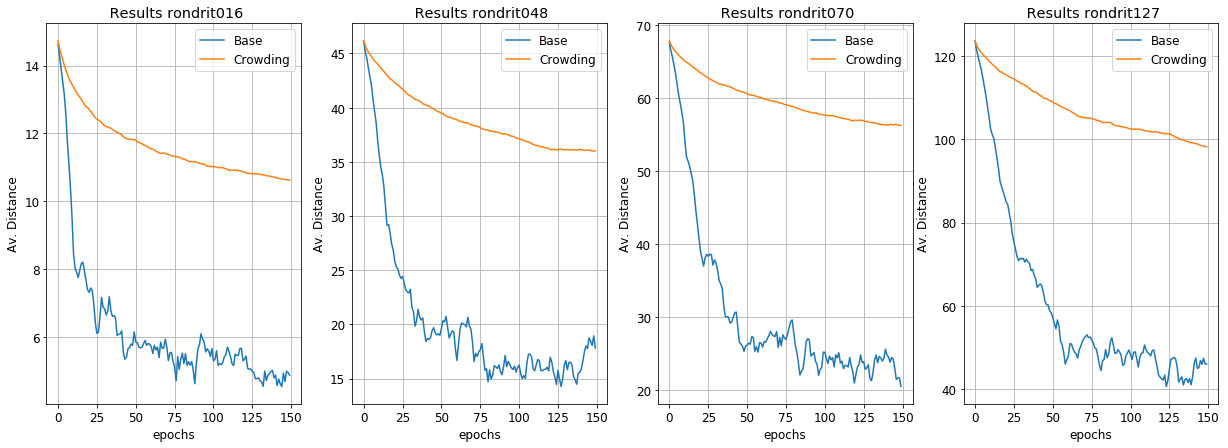

In [46]:
fig, axs = plt.subplots(1, len(running_distances.keys()), sharex=True, sharey=False,figsize=(21,7))
matplotlib.rcParams.update({'font.size': 12})

for i,Dataset in enumerate(running_distances.keys()):
    plot_ts_scal(Dataset,running_distances,axs[i])

In [11]:
ts_dict={}
labels=["Base","Crowding"]
dataset="rondrit016"
matfiles=['running_res_crowding_file-{0}.tsp-crowding-{1}.mat'.format(dataset,i) for i in range(1,3)]
matfolder=dir_path

for matfile,label in zip(matfiles,labels):
    mat_str = loadmat(os.path.join(matfolder,matfile))
    items=[item for item in mat_str['running_res'][0][0]]
    fit_values=[items[1].flat[i] for i in range(items[1].shape[1])]
    
    distances=[items[2].flat[i] for i in range(items[1].shape[1])]
    
    fitness_dict["epoch"]=range(len(fit_values))
    
    fitness_dict[label]=fit_values
    distances_dict[label]=distances
    

In [12]:
distances

[14.73571428571429,
 14.507020408163266,
 14.335755102040816,
 14.177959183673469,
 14.014857142857142,
 13.87595918367347,
 13.749265306122453,
 13.623836734693878,
 13.53342857142857,
 13.440081632653062,
 13.364857142857144,
 13.27179591836735,
 13.199959183673467,
 13.126571428571427,
 13.06542857142857,
 13.005469387755099,
 12.928816326530614,
 12.851673469387757,
 12.785673469387756,
 12.762775510204083,
 12.711877551020407,
 12.64473469387755,
 12.594857142857144,
 12.525714285714285,
 12.460408163265308,
 12.419469387755102,
 12.394163265306121,
 12.356,
 12.323020408163265,
 12.26138775510204,
 12.230571428571427,
 12.19608163265306,
 12.197387755102039,
 12.167551020408164,
 12.154,
 12.114571428571427,
 12.08530612244898,
 12.056000000000001,
 12.030285714285714,
 12.011224489795918,
 11.980204081632653,
 11.95314285714286,
 11.897428571428568,
 11.869265306122447,
 11.849387755102045,
 11.828204081632652,
 11.830571428571428,
 11.824408163265307,
 11.819714285714287,
 11.8

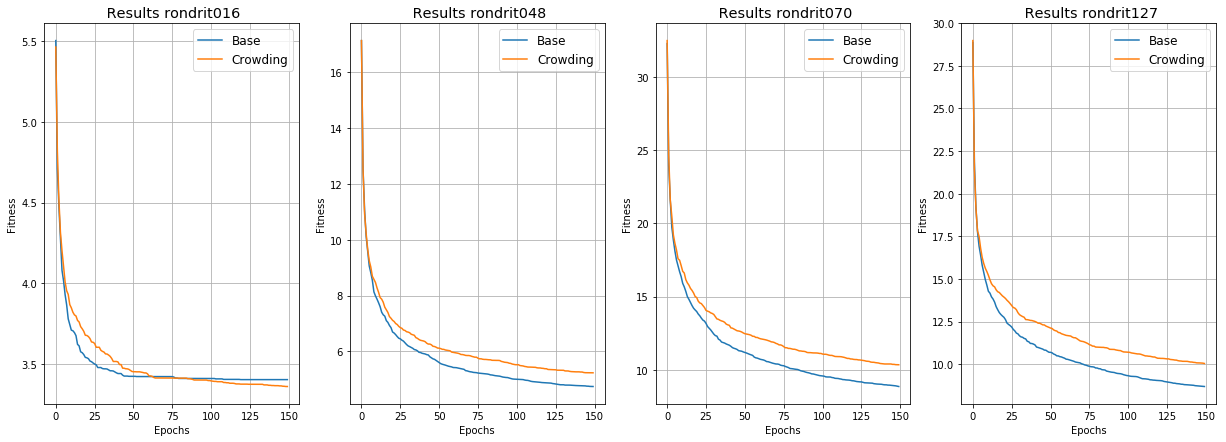

In [5]:
fig, axs = plt.subplots(1, len(dict_ts.keys()), sharex=True, sharey=False,figsize=(21,7))
matplotlib.rcParams.update({'font.size': 12})

for i,Dataset in enumerate(dict_ts.keys()):
    plot_ts_scal(Dataset,dict_ts,axs[i])